In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys 
sys.path.append(os.path.abspath("../../src"))   
import Soporte_preprocesamiento as f
import warnings
warnings.filterwarnings("ignore")




# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor



from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler


from tqdm import tqdm


# import plotly_express as px


# Métodos estadísticos
# -----------------------------------------------------------------------
from scipy.stats import zscore # para calcular el z-score
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
from sklearn.neighbors import NearestNeighbors # para calcular la epsilon

# Para generar combinaciones de listas
# -----------------------------------------------------------------------
from itertools import product, combinations
pd.set_option("display.max_columns", None)


In [2]:

df_rob=pd.read_pickle("../../datos/datos1/datos_sinnull_encoded_scaled.pkl").reset_index(drop=True)

In [3]:
df_rob.head(2)

Age  Attrition  BusinessTravel  Department  EducationField   JobRole  \
0  1.153846        0.0        0.000000        -1.0        0.533046 -0.463706   
1 -0.384615        1.0        0.099529         0.0        0.533046  0.523841   

   MaritalStatus  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
0            0.0       1.498811                 0.0               -0.5   
1            1.0      -0.133480                -1.0                1.5   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0           4.573311              -3.415572       -0.666667   
1           0.507253               0.102377        0.000000   

   YearsSinceLastPromotion  EnvironmentSatisfaction  JobSatisfaction  \
0                -0.333333                      0.0        -0.976241   
1                 0.000000                      0.0         0.023759   

   WorkLifeBalance  JobInvolvement  Gender_Female  Gender_Male  \
0         1.000000             0.0            1.0         -1.0   
1         1.446791             1.0            1.0         -1.0   

   DistanceFromHome_entre 1 y 4  DistanceFromHome_entre 13 y 18  \
0                           0.0                             0.0   
1                           0.0                             0.0   

   DistanceFromHome_entre 19 y 23  DistanceFromHome_entre 24 y 29  \
0                             0.0                             0.0   
1                             0.0                             0.0   

   DistanceFromHome_entre 5 y 8  DistanceFromHome_entre 9 y 12  \
0                           1.0                            0.0   
1                           0.0                            1.0   

   Education_Bachelor  Education_Below College  Education_College  \
0                 0.0                      0.0                1.0   
1                 0.0                      1.0                0.0   

   Education_Doctor  Education_Master  JobLevel_Head  JobLevel_Intern  \
0               0.0               0.0            0.0              1.0   
1               0.0               0.0            0.0              1.0   

   JobLevel_Junior  JobLevel_Manager  JobLevel_Senior  StockOptionLevel_Bad  \
0              0.0               0.0              0.0                   1.0   
1              0.0               0.0              0.0                   0.0   

   StockOptionLevel_Best  StockOptionLevel_Better  StockOptionLevel_Good  
0                    0.0                      0.0                    0.0  
1                    0.0                      0.0                    1.0

Primero identificamos los outliers en univariados

In [4]:
all_columns =df_rob.columns   

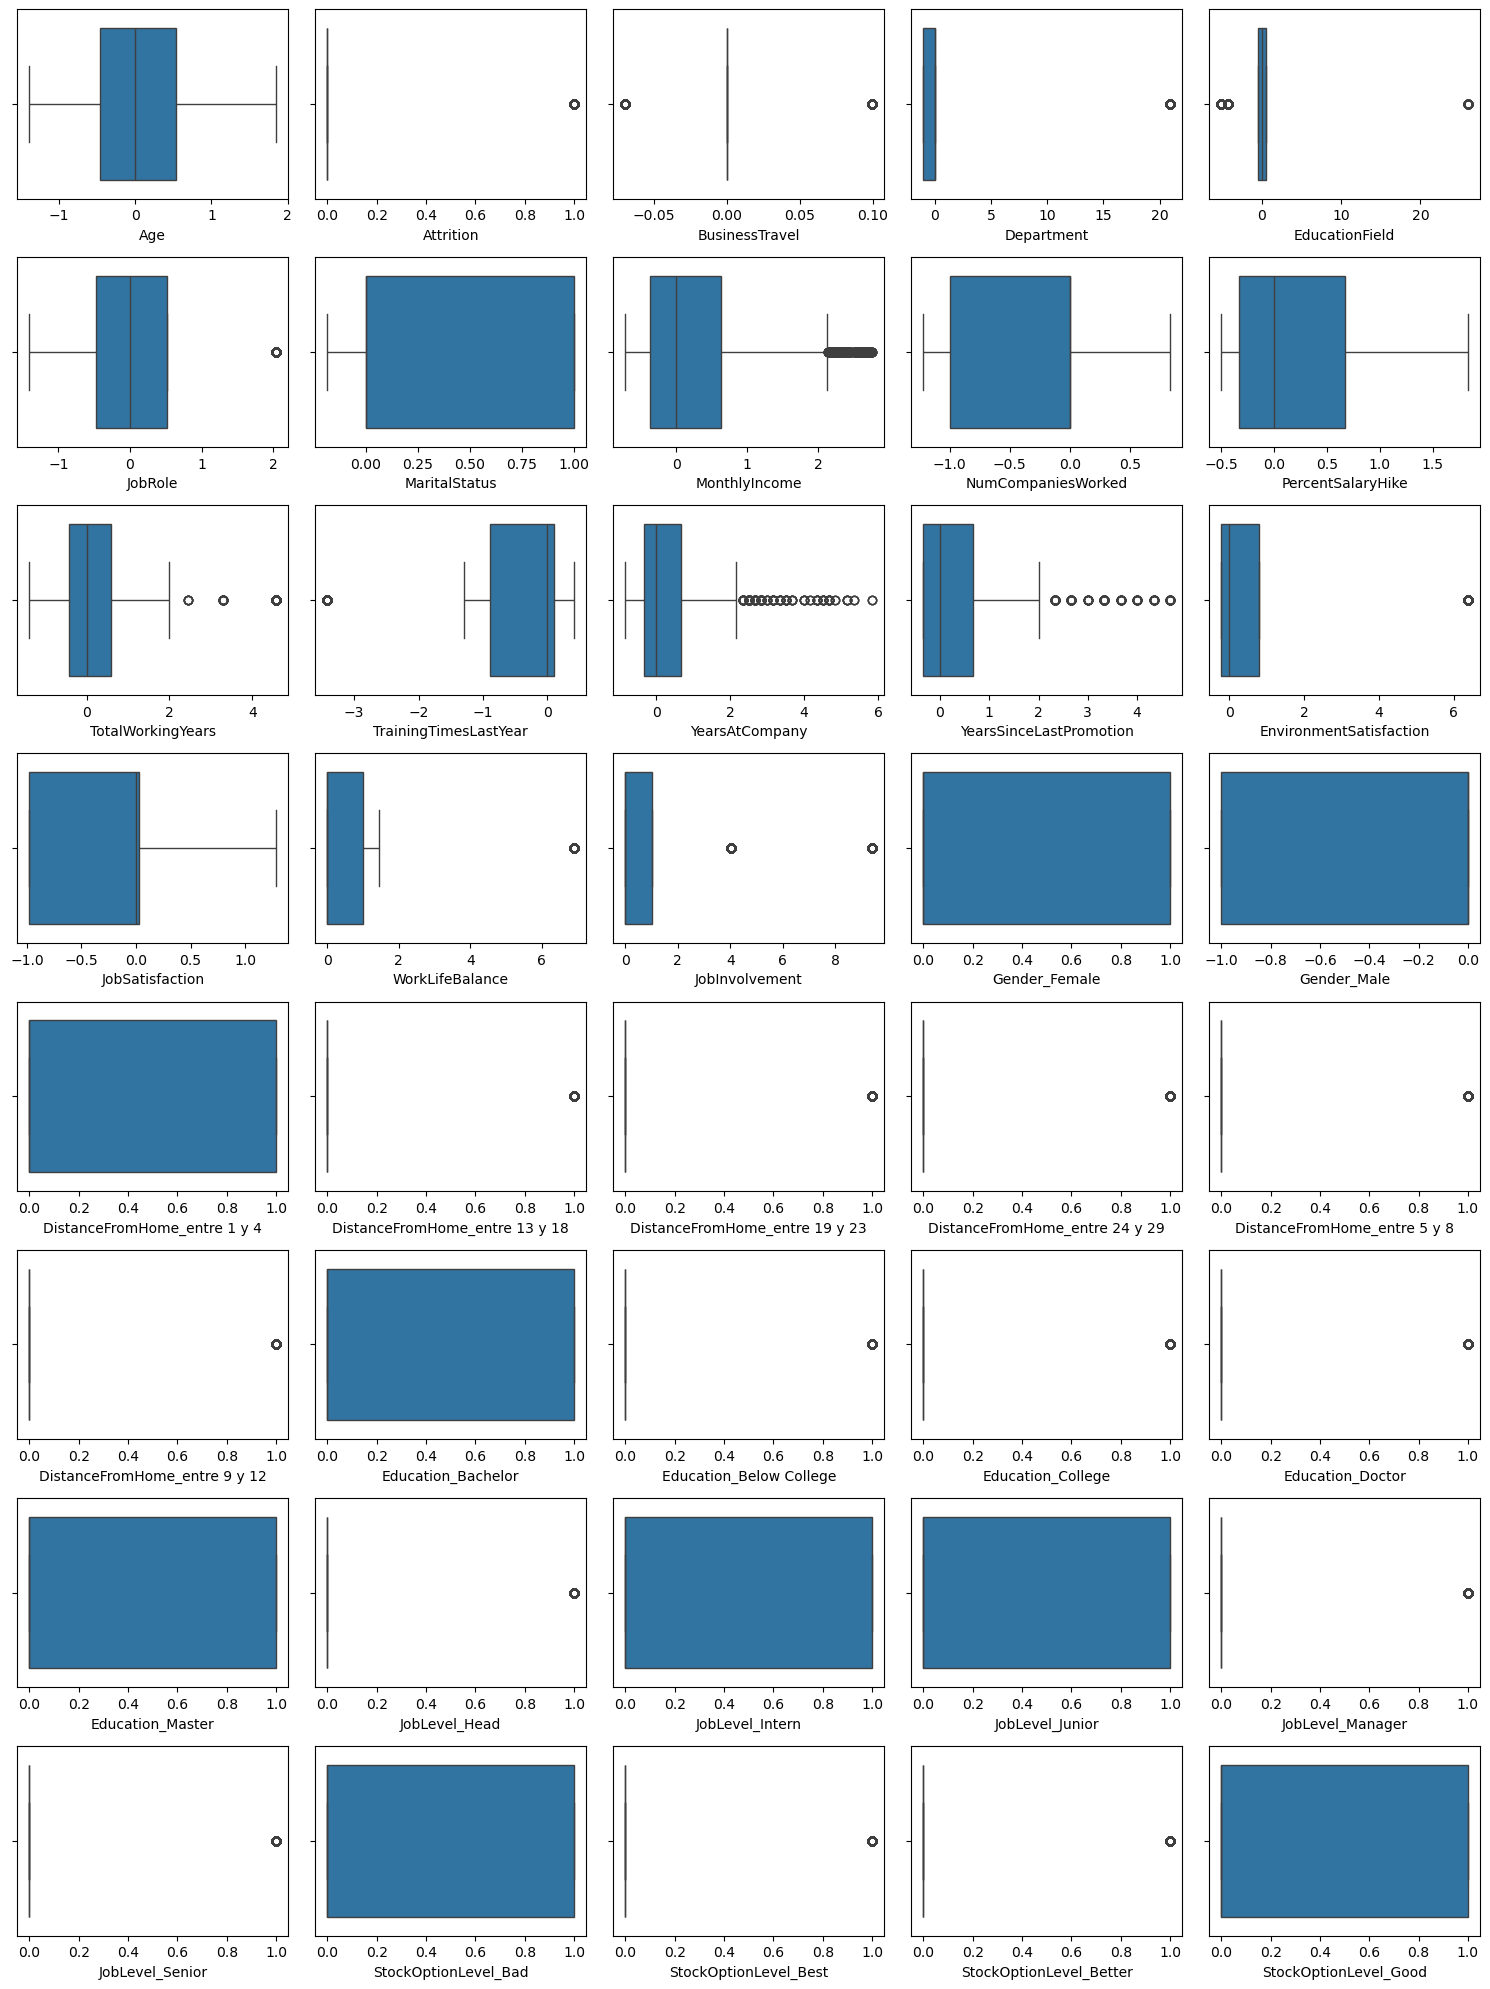

In [5]:
f.visualizar_outliers_box(df_rob, all_columns)

En esta gráfica recordamos las distribuciones (Tanto de categóricas como de numéricas) y en el caso de las numéricas muestro sus outliers univariados.

Observo los outliers de las numéricas ya seleccionadas mediante la metodología de escalador min max

Dado que no tienen todas una distribución normal, no utilizaré el Z-Score ya que el porcentaje de fallo será demasiado alto. Por ello opto por el IQR

In [6]:
dicc_iqr=f.identificar_outliers_iqr(df_rob)

La columna AGE tiene 0 outliers
La columna ATTRITION tiene 711 outliers
La columna BUSINESSTRAVEL tiene 1281 outliers
La columna DEPARTMENT tiene 189 outliers
La columna EDUCATIONFIELD tiene 723 outliers
La columna JOBROLE tiene 240 outliers
La columna MARITALSTATUS tiene 0 outliers
La columna MONTHLYINCOME tiene 342 outliers
La columna NUMCOMPANIESWORKED tiene 0 outliers
La columna PERCENTSALARYHIKE tiene 0 outliers
La columna TOTALWORKINGYEARS tiene 281 outliers
La columna TRAININGTIMESLASTYEAR tiene 195 outliers
La columna YEARSATCOMPANY tiene 312 outliers
La columna YEARSSINCELASTPROMOTION tiene 321 outliers
La columna ENVIRONMENTSATISFACTION tiene 845 outliers
La columna JOBSATISFACTION tiene 0 outliers
La columna WORKLIFEBALANCE tiene 239 outliers
La columna JOBINVOLVEMENT tiene 681 outliers
La columna GENDER_FEMALE tiene 0 outliers
La columna GENDER_MALE tiene 0 outliers
La columna DISTANCEFROMHOME_ENTRE 1 Y 4 tiene 0 outliers
La columna DISTANCEFROMHOME_ENTRE 13 Y 18 tiene 432 

Nos fijamos en que parece haber muy pocos Outliers

In [7]:
dicc_iqr["Attrition"].head(2)

Age  Attrition  BusinessTravel  Department  EducationField   JobRole  \
1 -0.384615        1.0        0.099529         0.0        0.533046  0.523841   
6 -0.615385        1.0        0.000000         0.0        0.000000  0.177356   

   MaritalStatus  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
1            1.0      -0.133480           -1.000000                1.5   
6            1.0       0.163467           -1.101865                1.0   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
1           0.507253               0.102377        0.000000   
6           0.582180               0.000000       -0.833333   

   YearsSinceLastPromotion  EnvironmentSatisfaction  JobSatisfaction  \
1                 0.000000                 0.000000         0.023759   
6                -0.333333                 6.382749         0.000000   

   WorkLifeBalance  JobInvolvement  Gender_Female  Gender_Male  \
1         1.446791             1.0            1.0         -1.0   
6         6.898971             0.0            0.0          0.0   

   DistanceFromHome_entre 1 y 4  DistanceFromHome_entre 13 y 18  \
1                           0.0                             0.0   
6                           0.0                             0.0   

   DistanceFromHome_entre 19 y 23  DistanceFromHome_entre 24 y 29  \
1                             0.0                             0.0   
6                             0.0                             0.0   

   DistanceFromHome_entre 5 y 8  DistanceFromHome_entre 9 y 12  \
1                           0.0                            1.0   
6                           0.0                            1.0   

   Education_Bachelor  Education_Below College  Education_College  \
1                 0.0                      1.0                0.0   
6                 0.0                      0.0                1.0   

   Education_Doctor  Education_Master  JobLevel_Head  JobLevel_Intern  \
1               0.0               0.0            0.0              1.0   
6               0.0               0.0            0.0              0.0   

   JobLevel_Junior  JobLevel_Manager  JobLevel_Senior  StockOptionLevel_Bad  \
1              0.0               0.0              0.0                   0.0   
6              1.0               0.0              0.0                   0.0   

   StockOptionLevel_Best  StockOptionLevel_Better  StockOptionLevel_Good  
1                    0.0                      0.0                    1.0  
6                    0.0                      0.0                    1.0

In [8]:
dicc_iqr["MonthlyIncome"].head(2)

Age  Attrition  BusinessTravel  Department  EducationField   JobRole  \
2  -0.307692        0.0        0.099529         0.0       -4.206791  0.177356   
55 -0.230769        0.0        0.099529         0.0        0.533046  2.040098   

    MaritalStatus  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
2             0.0       2.634668            0.000000           0.166667   
55            0.0       2.646370            0.612913          -0.333333   

    TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
2            0.582180               0.000000        0.000000   
55          -0.427069               0.102377        0.833333   

    YearsSinceLastPromotion  EnvironmentSatisfaction  JobSatisfaction  \
2                 -0.333333                 0.785248         0.023759   
55                 2.333333                -0.214752         0.023759   

    WorkLifeBalance  JobInvolvement  Gender_Female  Gender_Male  \
2          6.898971             0.0            0.0          0.0   
55         0.000000             0.0            0.0          0.0   

    DistanceFromHome_entre 1 y 4  DistanceFromHome_entre 13 y 18  \
2                            0.0                             1.0   
55                           0.0                             0.0   

    DistanceFromHome_entre 19 y 23  DistanceFromHome_entre 24 y 29  \
2                              0.0                             0.0   
55                             0.0                             0.0   

    DistanceFromHome_entre 5 y 8  DistanceFromHome_entre 9 y 12  \
2                            0.0                            0.0   
55                           0.0                            1.0   

    Education_Bachelor  Education_Below College  Education_College  \
2                  0.0                      0.0                0.0   
55                 1.0                      0.0                0.0   

    Education_Doctor  Education_Master  JobLevel_Head  JobLevel_Intern  \
2                0.0               1.0            0.0              0.0   
55               0.0               0.0            0.0              0.0   

    JobLevel_Junior  JobLevel_Manager  JobLevel_Senior  StockOptionLevel_Bad  \
2               0.0               1.0              0.0                   0.0   
55              0.0               1.0              0.0                   0.0   

    StockOptionLevel_Best  StockOptionLevel_Better  StockOptionLevel_Good  
2                     1.0                      0.0                    0.0  
55                    0.0                      0.0                    1.0

In [9]:
dicc_iqr["YearsAtCompany"].head(2)

Age  Attrition  BusinessTravel  Department  EducationField   JobRole  \
10  0.692308        0.0             0.0         0.0        0.000000  0.000000   
12  1.461538        0.0             0.0         0.0        0.533046  0.177356   

    MaritalStatus  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
10            0.0       0.561711                -1.0          -0.166667   
12            1.0       0.113183                -1.0           0.500000   

    TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
10          -1.380051                    0.0        2.500000   
12          -0.326719                    0.0        5.166667   

    YearsSinceLastPromotion  EnvironmentSatisfaction  JobSatisfaction  \
10                      1.0                 0.000000        -0.976241   
12                      1.0                -0.214752         1.283832   

    WorkLifeBalance  JobInvolvement  Gender_Female  Gender_Male  \
10              0.0             1.0            0.0          0.0   
12              0.0             0.0            1.0         -1.0   

    DistanceFromHome_entre 1 y 4  DistanceFromHome_entre 13 y 18  \
10                           0.0                             1.0   
12                           0.0                             1.0   

    DistanceFromHome_entre 19 y 23  DistanceFromHome_entre 24 y 29  \
10                             0.0                             0.0   
12                             0.0                             0.0   

    DistanceFromHome_entre 5 y 8  DistanceFromHome_entre 9 y 12  \
10                           0.0                            0.0   
12                           0.0                            0.0   

    Education_Bachelor  Education_Below College  Education_College  \
10                 0.0                      0.0                1.0   
12                 0.0                      0.0                0.0   

    Education_Doctor  Education_Master  JobLevel_Head  JobLevel_Intern  \
10               0.0               0.0            0.0              0.0   
12               0.0               1.0            0.0              1.0   

    JobLevel_Junior  JobLevel_Manager  JobLevel_Senior  StockOptionLevel_Bad  \
10              1.0               0.0              0.0                   0.0   
12              0.0               0.0              0.0                   1.0   

    StockOptionLevel_Best  StockOptionLevel_Better  StockOptionLevel_Good  
10                    0.0                      1.0                    0.0  
12                    0.0                      0.0                    0.0

In [10]:
dicc_iqr["YearsSinceLastPromotion"].head(2)

Age  Attrition  BusinessTravel  Department  EducationField   JobRole  \
11  0.000000        0.0        0.000000         0.0        0.533046  0.000000   
13  0.846154        1.0       -0.069569         0.0        0.000000  0.523841   

    MaritalStatus  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
11            0.0      -0.281953                -1.0          -0.333333   
13            0.0       0.154142                 0.0          -0.500000   

    TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
11          -0.724335               0.000000        1.666667   
13          -0.146876              -1.293214        0.833333   

    YearsSinceLastPromotion  EnvironmentSatisfaction  JobSatisfaction  \
11                 3.000000                 0.000000        -0.976241   
13                 2.666667                 6.382749         0.023759   

    WorkLifeBalance  JobInvolvement  Gender_Female  Gender_Male  \
11              0.0             0.0            0.0          0.0   
13              1.0             1.0            0.0          0.0   

    DistanceFromHome_entre 1 y 4  DistanceFromHome_entre 13 y 18  \
11                           0.0                             0.0   
13                           1.0                             0.0   

    DistanceFromHome_entre 19 y 23  DistanceFromHome_entre 24 y 29  \
11                             0.0                             1.0   
13                             0.0                             0.0   

    DistanceFromHome_entre 5 y 8  DistanceFromHome_entre 9 y 12  \
11                           0.0                            0.0   
13                           0.0                            0.0   

    Education_Bachelor  Education_Below College  Education_College  \
11                 0.0                      1.0                0.0   
13                 0.0                      1.0                0.0   

    Education_Doctor  Education_Master  JobLevel_Head  JobLevel_Intern  \
11               0.0               0.0            0.0              1.0   
13               0.0               0.0            0.0              1.0   

    JobLevel_Junior  JobLevel_Manager  JobLevel_Senior  StockOptionLevel_Bad  \
11              0.0               0.0              0.0                   0.0   
13              0.0               0.0              0.0                   0.0   

    StockOptionLevel_Best  StockOptionLevel_Better  StockOptionLevel_Good  
11                    0.0                      1.0                    0.0  
13                    0.0                      1.0                    0.0

In [11]:
dicc_iqr["TotalWorkingYears"].head(2)

Age  Attrition  BusinessTravel  Department  EducationField   JobRole  \
0   1.153846        0.0             0.0        -1.0        0.533046 -0.463706   
38 -1.384615        1.0             0.0         0.0        0.533046  0.177356   

    MaritalStatus  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
0             0.0       1.498811                 0.0               -0.5   
38            1.0      -0.472481                 0.0                0.0   

    TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0            4.573311              -3.415572       -0.666667   
38           3.285388               0.102377       -0.833333   

    YearsSinceLastPromotion  EnvironmentSatisfaction  JobSatisfaction  \
0                 -0.333333                      0.0        -0.976241   
38                -0.333333                      0.0         0.000000   

    WorkLifeBalance  JobInvolvement  Gender_Female  Gender_Male  \
0               1.0             0.0            1.0         -1.0   
38              0.0             1.0            0.0          0.0   

    DistanceFromHome_entre 1 y 4  DistanceFromHome_entre 13 y 18  \
0                            0.0                             0.0   
38                           1.0                             0.0   

    DistanceFromHome_entre 19 y 23  DistanceFromHome_entre 24 y 29  \
0                              0.0                             0.0   
38                             0.0                             0.0   

    DistanceFromHome_entre 5 y 8  DistanceFromHome_entre 9 y 12  \
0                            1.0                            0.0   
38                           0.0                            0.0   

    Education_Bachelor  Education_Below College  Education_College  \
0                  0.0                      0.0                1.0   
38                 0.0                      0.0                0.0   

    Education_Doctor  Education_Master  JobLevel_Head  JobLevel_Intern  \
0                0.0               0.0            0.0              1.0   
38               0.0               1.0            0.0              1.0   

    JobLevel_Junior  JobLevel_Manager  JobLevel_Senior  StockOptionLevel_Bad  \
0               0.0               0.0              0.0                   1.0   
38              0.0               0.0              0.0                   0.0   

    StockOptionLevel_Best  StockOptionLevel_Better  StockOptionLevel_Good  
0                     0.0                      0.0                    0.0  
38                    0.0                      1.0                    0.0

Observamos como el número de outliers por lo general es alto (un poco menos del 10% de las filas) y parecen estar muy juntos entre ellos en MonthlyIncome, mientras que en el resto si que están más separados. Esto me lleva a pensar que un LOF podría ser la mejor opción. Sin embargo, vamos a comprobarlo. 

In [12]:
# contaminacion= [0.01, 0.05, 0.1]
# estimadores = [100,400,1000, 2000] 
# combinaciones= list(product(contaminacion, estimadores))
# for cont, esti in combinaciones:
    
#     ifo=IsolationForest(random_state=42, n_estimators=esti, contamination= cont, n_jobs=-1)         #n_estimator es el número de árboles y n_jobs con -1 coge todos los nucleos del ordenador

#     df_rob[f"outliers_ifo_{cont}_{esti}"]=ifo.fit_predict(df_rob[["price","size_MinMax","distance_MinMax"]]) 

In [13]:
# df_rob["outliers_ifo_0.01_100"].value_counts(normalize=True)    #Esto nos muetsra como se acerca mucho al 1% de outliers por el nivel de contaminación ser 0.01

In [14]:
# df_min.head()

In [15]:
# columnas_hue=df_min.filter(like="outliers")

In [16]:
# combinaciones_visual=list(combinations(["price","size_MinMax","distance_MinMax"], 2))

# for out in columnas_hue:


#     fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,5))
#     axes=axes.flat
#     for indice, tupla in enumerate(combinaciones_visual):
#         sns.scatterplot(x=tupla[0], y=tupla[1], ax= axes[indice], data=df_min, hue= out, palette= "Set1", alpha= 0.2, style= out)

<!-- Observamos como a mayor número de arboles los outliers se van agrupando más.  
Además según vamos siendo más estrictos con el nivel de contaminación, más sentido tiene la interpretación. 
Podemos observar como el IFO nos muestrá que por lo general los precios bajos son considerados outliers. -->

In [17]:
# df_min.head()

<!-- 
A pesar de que teóricamente el IFO por las carcaterísticas de los datos parece ser la mejor opción y tras haber observado que marca outliers en los precios ma´s bajo. Pasamos ahora a identificar los outliers con la metodología LOF.

Para poder comparar más fácil voy a sacar IFO y LOF juntos. -->

100%|██████████| 12/12 [00:19<00:00,  1.60s/it]


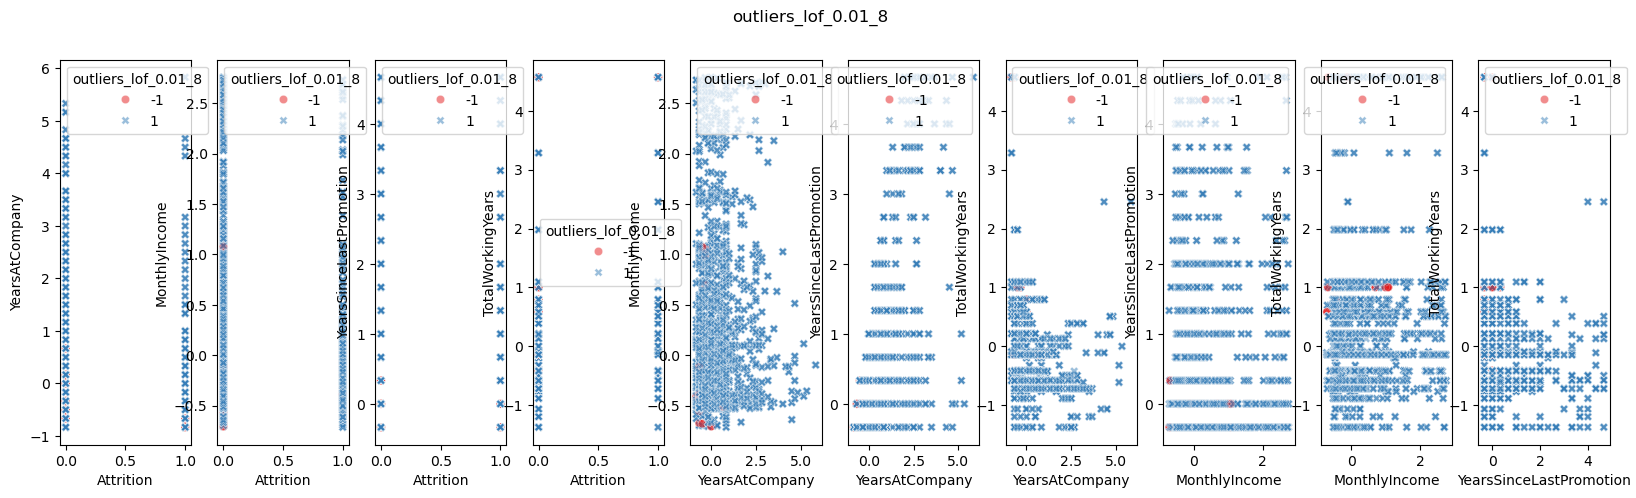

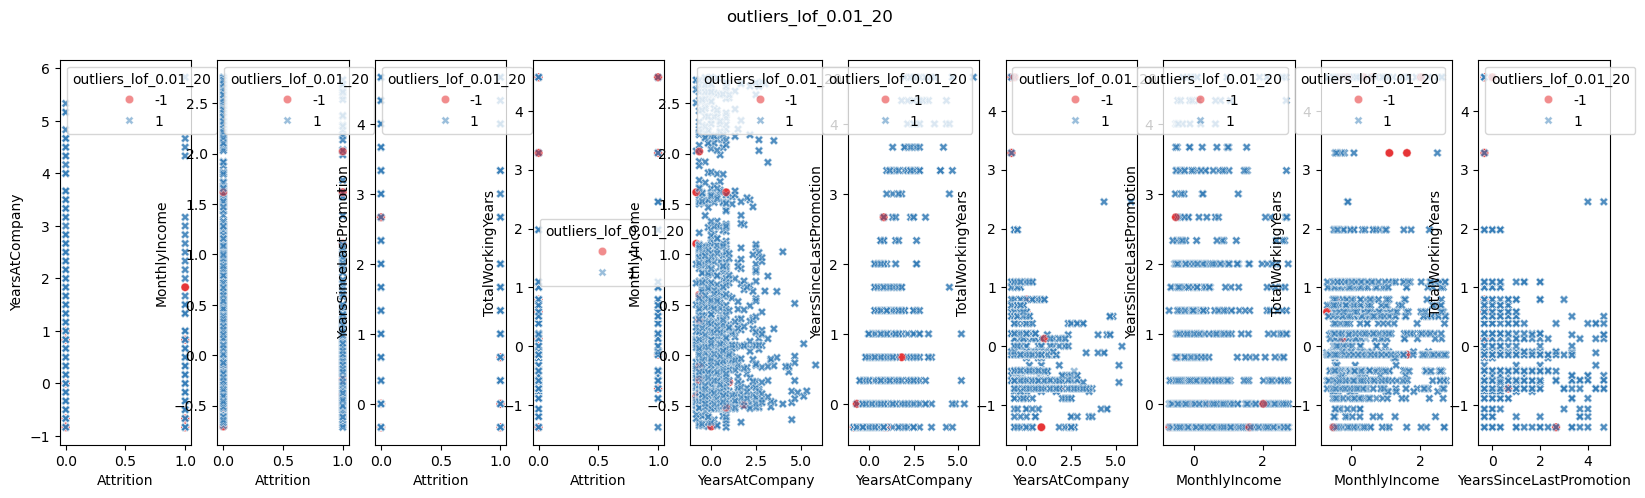

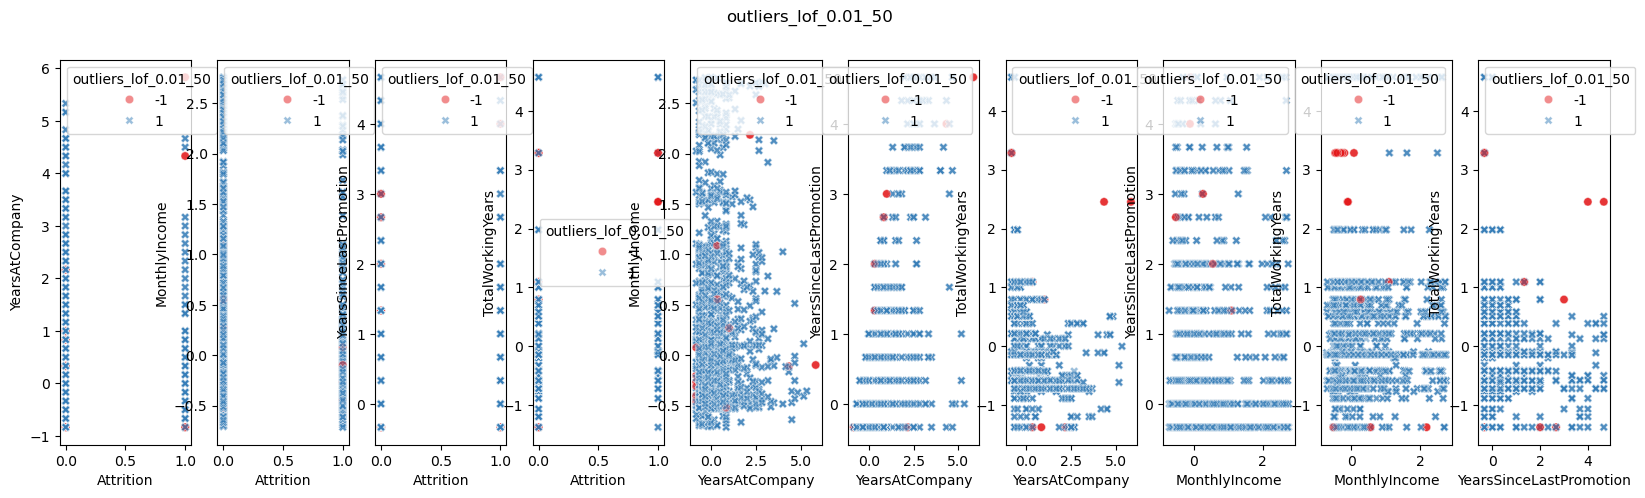

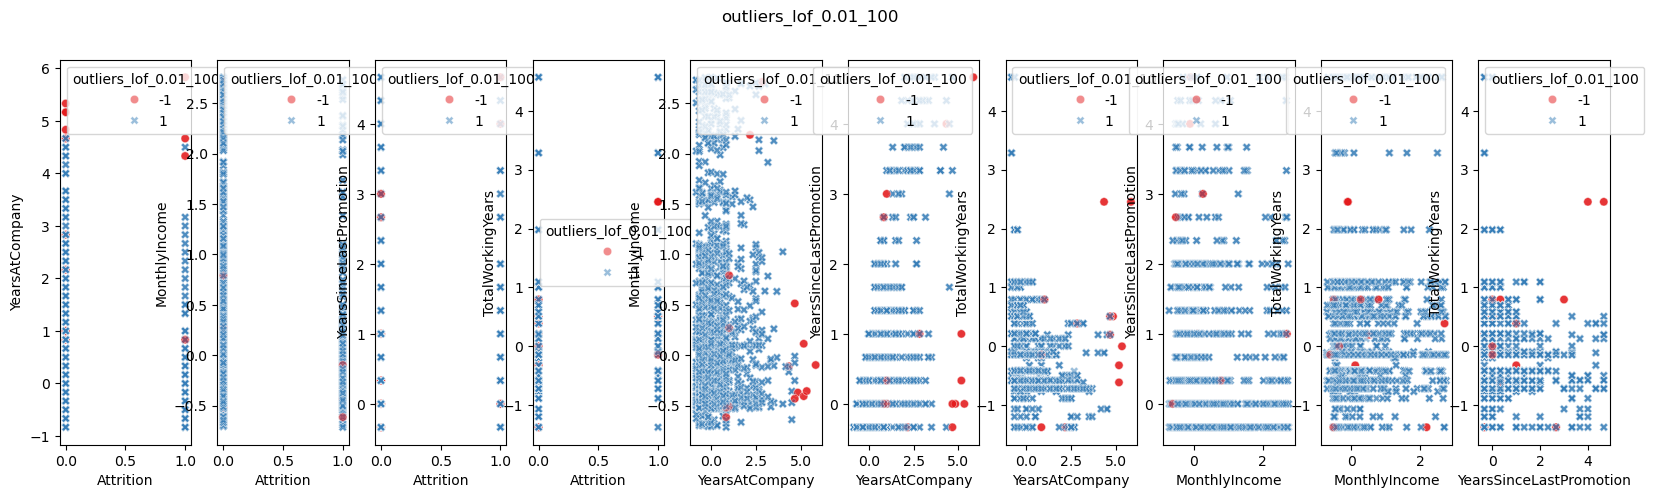

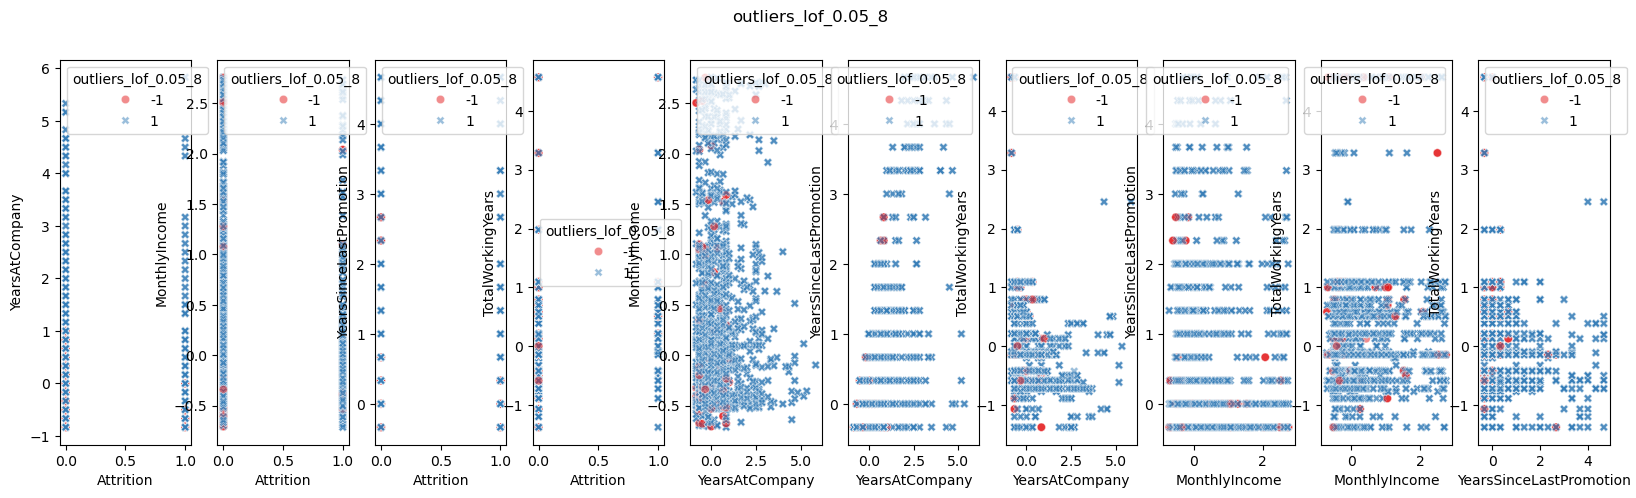

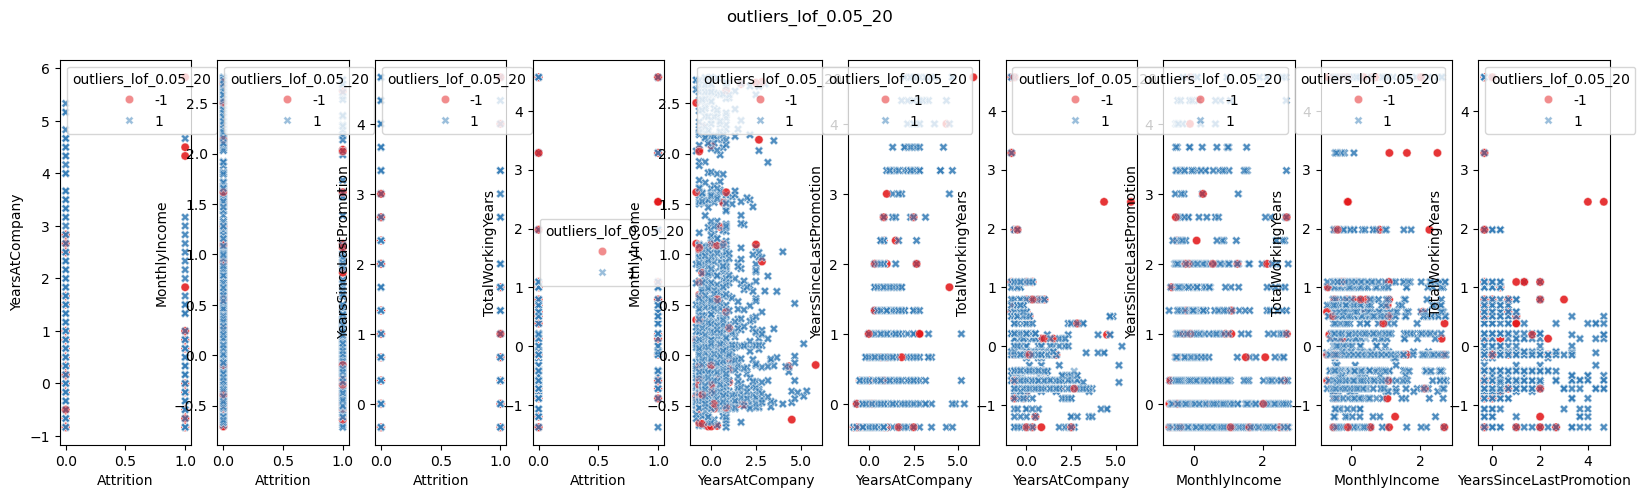

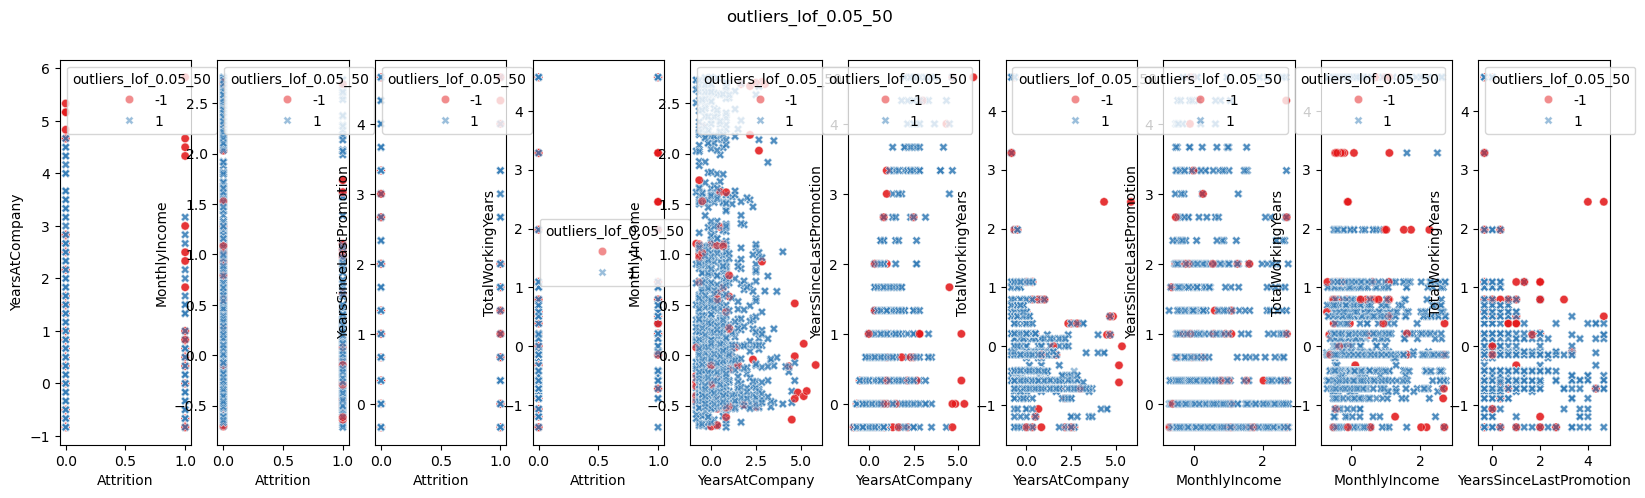

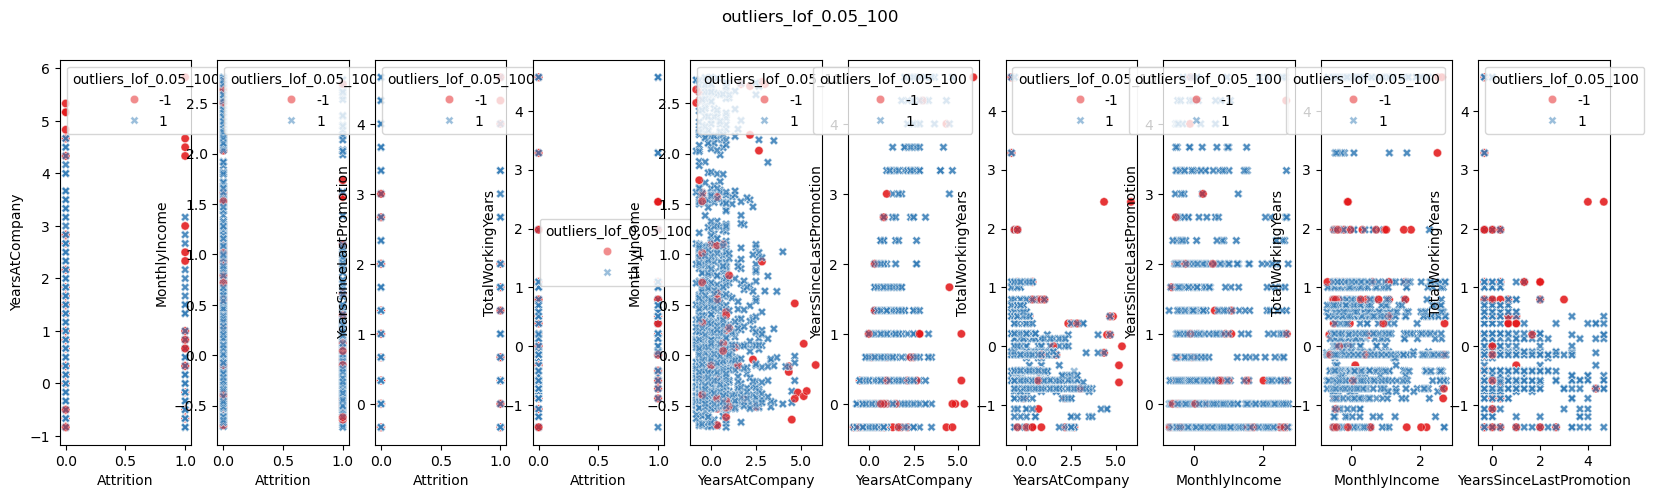

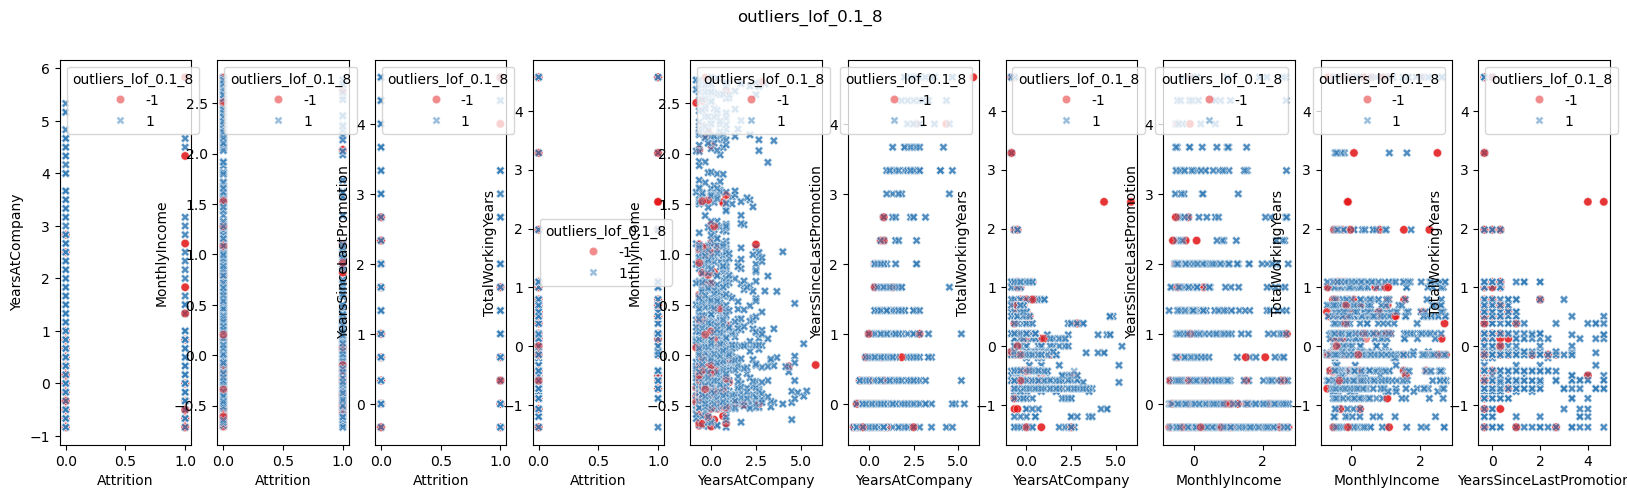

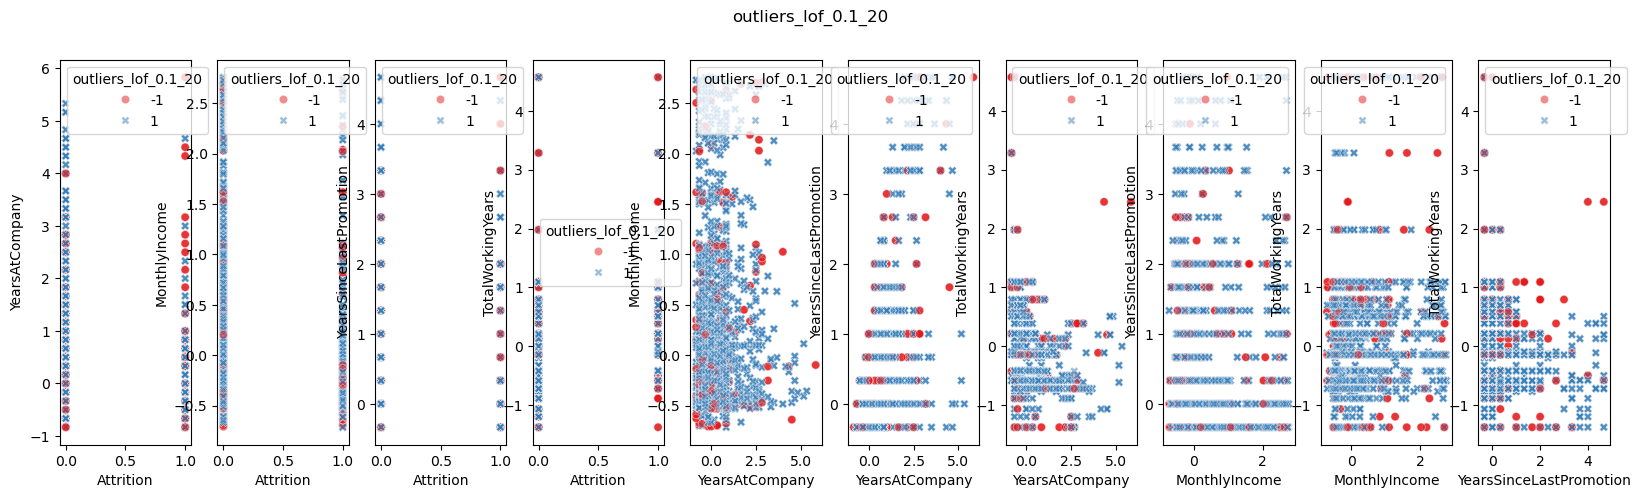

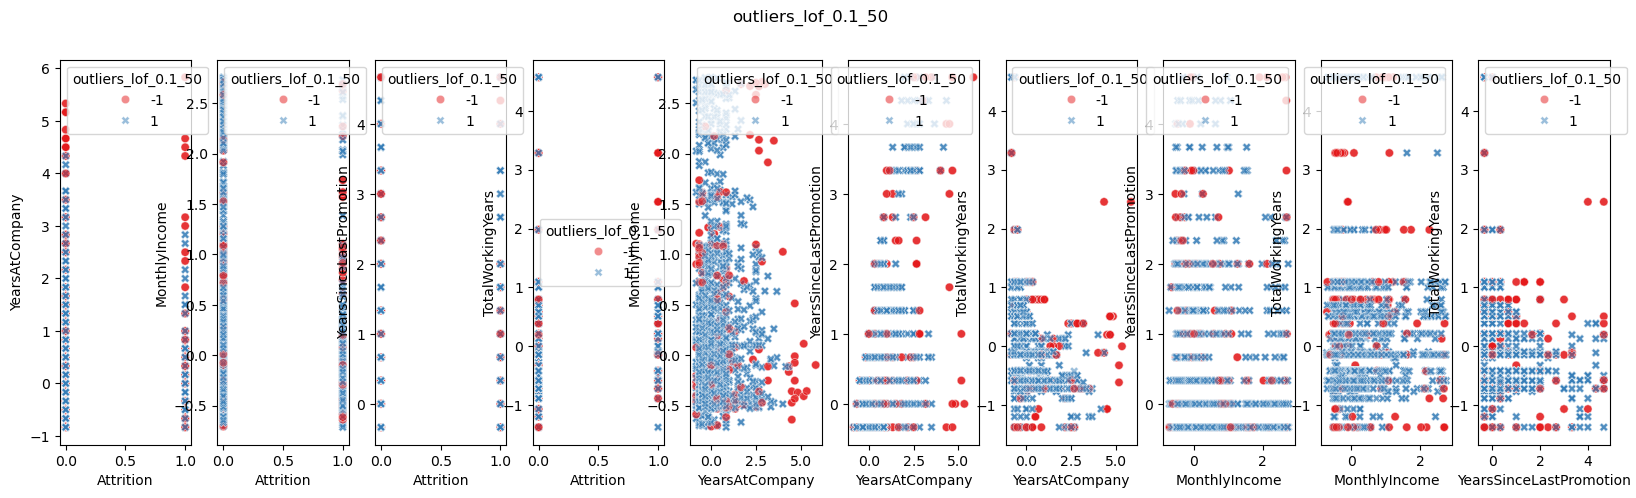

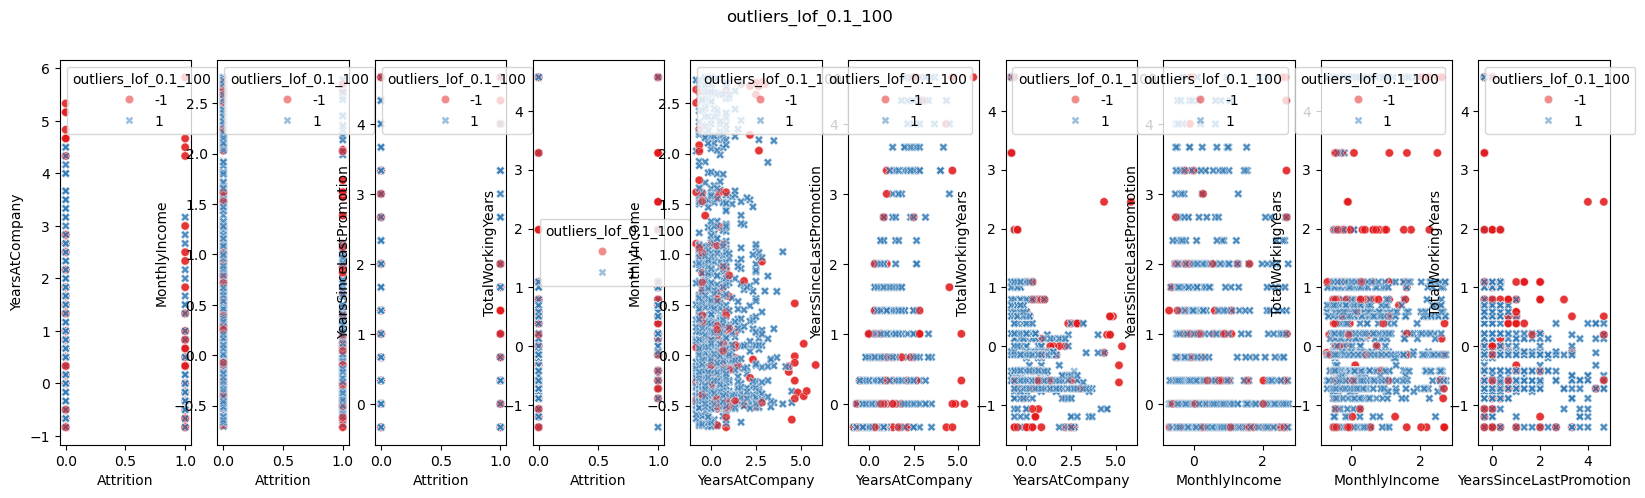

In [18]:
lista_contaminaciones = [0.01, 0.05, 0.1]
lista_neighbors = [8,20,50,100]

combinaciones = list(product(lista_contaminaciones, lista_neighbors))
combinaciones


for cont, neighbors in tqdm(combinaciones):
    lof = LocalOutlierFactor(n_neighbors=neighbors,
                            contamination=cont,
                            n_jobs=-1)

    df_rob[f"outliers_lof_{cont}_{neighbors}"] = lof.fit_predict(df_rob[["Attrition","YearsAtCompany","MonthlyIncome", "YearsSinceLastPromotion","TotalWorkingYears"]])
    y_pred = lof.fit_predict(df_rob[["Attrition","YearsAtCompany","MonthlyIncome", "YearsSinceLastPromotion","TotalWorkingYears"]])
df_rob

#visualizacion
columnas_hue = df_rob.filter(like="outlier").columns

combinaciones_viz = list(combinations(["Attrition","YearsAtCompany","MonthlyIncome", "YearsSinceLastPromotion","TotalWorkingYears"], 2))
combinaciones_viz

for outlier in tqdm(columnas_hue):
    fig, axes = plt.subplots(nrows=1, ncols=10, figsize = (20, 5))
    axes = axes.flat

    for indice, tupla in enumerate(combinaciones_viz):
        sns.scatterplot(x = tupla[0],
                        y = tupla[1],
                        ax = axes[indice],
                        data = df_rob,
                        hue=outlier,
                        palette="Set1",
                        style=outlier,
                        alpha=0.5)
        
    plt.suptitle(outlier)

Lo que saco en claro es que el nivel de contaminación más estricto (10%) es la mejor opción porque es el que más se acerca a la realidad de los datos.  

Tras observar los gráficos del LOF observo que en el caso del tamaño, se consideran outliers aquellas viviendas que cuentan con un alto precio y según van aumentando su tamaño se va reduciendo el número de outliers. Por otro lado, al  observar la distancia nos percatamos de que de nuevo los outliers se concentran en los precios más altos lo que en un principio parece no tener sentido pues se mantienen aproximadamente igual distribuidos a lo largo de las distintas distancias. Sin embargo, no nos podemos fiar porque puede que esos datos sean outliers por otras variables que no sea la distancia.

Por el momento, me parece más adecuado hacer uso de la metodología IFO.


In [19]:
df_rob.head()

Age  Attrition  BusinessTravel  Department  EducationField   JobRole  \
0  1.153846        0.0        0.000000        -1.0        0.533046 -0.463706   
1 -0.384615        1.0        0.099529         0.0        0.533046  0.523841   
2 -0.307692        0.0        0.099529         0.0       -4.206791  0.177356   
3  0.153846        0.0       -0.069569         0.0        0.533046 -0.745947   
4 -0.307692        0.0        0.000000         0.0        0.000000  0.177356   

   MaritalStatus  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
0            0.0       1.498811            0.000000          -0.500000   
1            1.0      -0.133480           -1.000000           1.500000   
2            0.0       2.634668            0.000000           0.166667   
3            0.0       0.622052           -1.217444          -0.500000   
4            1.0      -0.471201           -0.926020          -0.333333   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0           4.573311              -3.415572       -0.666667   
1           0.507253               0.102377        0.000000   
2           0.582180               0.000000        0.000000   
3          -0.588440              -0.897623        0.500000   
4          -0.417820               0.000000        0.166667   

   YearsSinceLastPromotion  EnvironmentSatisfaction  JobSatisfaction  \
0                -0.333333                 0.000000        -0.976241   
1                 0.000000                 0.000000         0.023759   
2                -0.333333                 0.785248         0.023759   
3                 2.000000                -0.214752        -0.976241   
4                -0.333333                -0.214752         1.283832   

   WorkLifeBalance  JobInvolvement  Gender_Female  Gender_Male  \
0         1.000000             0.0            1.0         -1.0   
1         1.446791             1.0            1.0         -1.0   
2         6.898971             0.0            0.0          0.0   
3         0.000000             1.0            0.0          0.0   
4         0.000000             0.0            0.0          0.0   

   DistanceFromHome_entre 1 y 4  DistanceFromHome_entre 13 y 18  \
0                           0.0                             0.0   
1                           0.0                             0.0   
2                           0.0                             1.0   
3                           1.0                             0.0   
4                           0.0                             0.0   

   DistanceFromHome_entre 19 y 23  DistanceFromHome_entre 24 y 29  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   DistanceFromHome_entre 5 y 8  DistanceFromHome_entre 9 y 12  \
0                           1.0                            0.0   
1                           0.0                            1.0   
2                           0.0                            0.0   
3                           0.0                            0.0   
4                           0.0                            1.0   

   Education_Bachelor  Education_Below College  Education_College  \
0                 0.0                      0.0                1.0   
1                 0.0                      1.0                0.0   
2                 0.0                      0.0                0.0   
3                 0.0                      0.0                0.0   
4                 0.0                      1.0                0.0   

   Education_Doctor  Education_Master  JobLevel_Head  JobLevel_Intern  \
0               0.0               0.0            0.0              1.0   
1               0.0               0.0            0.0              1.0   
2               0.0     

Ahora me quito las que tengan todas las filas con 1 y así me quedo con todas las que al menos tienen un Outlier

In [20]:
columnasdf=df_rob.filter(like="outliers_lof")
columnas_lof=columnasdf.columns

In [21]:

# filtered_df = df_rob[(df_rob[columnas_lof] == -1).all(axis=1)]

In [22]:
# filtered_df

In [23]:
# filtered_df.shape

<!-- Al observar las filas que tienen todos los valores con -1 y observar que suponen una parte ínfima de los datos, se decide eliminarlos -->

In [24]:
# df_result = df_rob.drop(index = filtered_df.index)

In [25]:
# df_result.reset_index(drop=True, inplace=True)

In [26]:
# df_result.shape

Ahora seleccionamos el 70% de los outliers

In [27]:
proporcion = 0.7 * len(columnas_lof)
df_outliers_70 = df_rob[df_rob[columnas_lof].eq(-1).sum(axis=1) >= proporcion]


In [28]:
df_rob.shape

(4410, 52)

In [29]:
df_outliers_70.shape

(9, 52)

#### ***Observamos El MonthlyIncome***

In [30]:
df_outliers_70["MonthlyIncome"].shape

(9,)

In [31]:
df_outliers_70["MonthlyIncome"].max()

-0.09764125068568293

In [32]:
df_outliers_70[df_outliers_70["MonthlyIncome"] > -0.12]["MonthlyIncome"]

337    -0.110075
1338   -0.097641
1807   -0.110075
2808   -0.097641
3277   -0.110075
4278   -0.097641
Name: MonthlyIncome, dtype: float64

In [33]:
df_outliers_70[df_outliers_70["MonthlyIncome"] > -0.12]["MonthlyIncome"].shape

(6,)

In [34]:
df_outliers_70[df_outliers_70["MonthlyIncome"] < -0.12]["MonthlyIncome"].shape

(3,)

Estamos observando los valores menores a -0.12 (aproximadamente a partir de 375 €)

In [35]:
df_outliers_70.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 337 to 4278
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             9 non-null      float64
 1   Attrition                       9 non-null      float64
 2   BusinessTravel                  9 non-null      float64
 3   Department                      9 non-null      float64
 4   EducationField                  9 non-null      float64
 5   JobRole                         9 non-null      float64
 6   MaritalStatus                   9 non-null      float64
 7   MonthlyIncome                   9 non-null      float64
 8   NumCompaniesWorked              9 non-null      float64
 9   PercentSalaryHike               9 non-null      float64
 10  TotalWorkingYears               9 non-null      float64
 11  TrainingTimesLastYear           9 non-null      float64
 12  YearsAtCompany                  9 non-nu

#### ***Observamos El YearsAtCompany***

In [36]:
df_outliers_70["YearsAtCompany"].shape

(9,)

In [37]:
df_outliers_70["YearsAtCompany"].max()

5.833333333333333

In [38]:
df_outliers_70[df_outliers_70["YearsAtCompany"] > 4.1]["YearsAtCompany"]

337     4.333333
1338    5.833333
1807    4.333333
2808    5.833333
3277    4.333333
4278    5.833333
Name: YearsAtCompany, dtype: float64

In [39]:
df_outliers_70[df_outliers_70["YearsAtCompany"] > 4.1]["YearsAtCompany"].shape

(6,)

In [40]:
df_outliers_70[df_outliers_70["YearsAtCompany"] < 4.1]["YearsAtCompany"].shape

(3,)

Estamos observando los valores mayores a 4.1 (aproximadamente a partir de 31 años en la empresa)

#### ***Observamos El YearsSinceLastPromotion***

In [41]:
df_outliers_70["YearsSinceLastPromotion"].shape

(9,)

In [42]:
df_outliers_70["YearsSinceLastPromotion"].max()

4.666666666666667

In [43]:
df_outliers_70[df_outliers_70["YearsSinceLastPromotion"] > 4.1]["YearsSinceLastPromotion"]

1338    4.666667
2808    4.666667
4278    4.666667
Name: YearsSinceLastPromotion, dtype: float64

In [44]:
df_outliers_70[df_outliers_70["YearsSinceLastPromotion"] > 4.1]["YearsSinceLastPromotion"].shape

(3,)

In [45]:
df_outliers_70[df_outliers_70["YearsSinceLastPromotion"] < 4.1]["YearsSinceLastPromotion"].shape

(6,)

Estamos observando los valores mayores a 4.1 (aproximadamente a partir de 13 años desde la última promoción)

#### ***Observamos El TotalWorkingYears***

In [46]:
df_outliers_70["TotalWorkingYears"].shape

(9,)

In [47]:
df_outliers_70["TotalWorkingYears"].max()

2.4537415989290863

In [48]:
df_outliers_70[df_outliers_70["TotalWorkingYears"] > 2.1]["TotalWorkingYears"]

337     2.453742
1338    2.453742
1807    2.453742
2808    2.453742
3277    2.453742
4278    2.453742
Name: TotalWorkingYears, dtype: float64

In [49]:
df_outliers_70[df_outliers_70["TotalWorkingYears"] > 2.1]["TotalWorkingYears"].shape

(6,)

In [50]:
df_outliers_70[df_outliers_70["TotalWorkingYears"] < 2.1]["TotalWorkingYears"].shape

(3,)

Estamos observando los valores mayores a 2.1 (aproximadamente a partir de 30 años totales trabajando)

**Aqui me cargo los outliers**  (En un futuro igual los imputo con iterative)  


In [51]:
df_outliers_70.shape

(9, 52)

In [52]:
df_outliers_70=df_outliers_70[df_outliers_70["MonthlyIncome"] < -0.12]

In [53]:
df_outliers_70=df_outliers_70[df_outliers_70["YearsAtCompany"] > 4.1 ]

In [54]:
df_outliers_70=df_outliers_70[df_outliers_70["YearsSinceLastPromotion"] > 4.1]

In [55]:
df_outliers_70=df_outliers_70[df_outliers_70["TotalWorkingYears"] > 2.1 ]

In [56]:
df_outliers_70.shape

(0, 52)

In [ ]:
# df_result.loc[df_outliers_70.index, "TotalWorkingYears"] = np.nan
# df_result.loc[df_outliers_70.index, "YearsAtCompany"] = np.nan

In [ ]:
# df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   424 non-null    float64
 1   propertyType            424 non-null    object 
 2   exterior                424 non-null    bool   
 3   rooms                   424 non-null    object 
 4   bathrooms               424 non-null    object 
 5   province                424 non-null    object 
 6   municipality            424 non-null    object 
 7   status                  424 non-null    object 
 8   newDevelopment          424 non-null    object 
 9   floor                   424 non-null    object 
 10  district                424 non-null    object 
 11  hasLift                 424 non-null    object 
 12  parkingSpace            424 non-null    object 
 13  size_MinMax             422 non-null    float64
 14  distance_MinMax         422 non-null    fl

caso con iterative

In [57]:
# df_numericas=df.select_dtypes(include=np.number)
# df_numericas.drop(columns="price", inplace=True)
# imputer_iterative= IterativeImputer()       #Aquí se puede poner el KNNImputer o el RandomForestRegressor
#                                             #missing values es por si los nulos no estan como np.nan sino en texto por ejemplo (aunque lo suyo es limpiarlo en el EDA)
#                                             #initial_strategy= "median" sirve para indicar que me lo haga con las medianas
# iterative_imputado=imputer_iterative.fit_transform(df_numericas)   #como es solo para numericas se tiene que meter el df de numericas pero hay que definirlo otra vez porque hemos dropeado duplicados
# df_iterativo=df_result.copy()
# df_num_sin_nulos=pd.DataFrame(iterative_imputado, columns= df_numericas.columns)  #para que tenga los mismo nombres de columnas
# df_iterativo[df_numericas.columns]= df_num_sin_nulos    #Con esto metemos todo el dataframe de las numericas sin nulos donde corresponda rellenando esos nulos

In [58]:
# df_iterativo.isna().sum()

In [59]:
# df_iterativo.describe().T

In [60]:
# df_iterativo.to_csv("../../datos/datos1/datos_sin_outliers_iterativo.csv")

In [61]:
# df_it=pd.read_csv("../../datos/datos1/datos_sin_outliers_iterativo.csv", index_col=0).reset_index(drop=True)

In [62]:
# df_filt_it=df_it[["price", "size_MinMax", "distance_MinMax"]]

In [63]:
# f.plot_outliers_univariados(df_filt_it, "b", (15,10))

In [64]:
# df_est_con3=df_min[["price", "size_MinMax", "distance_MinMax"]]

In [65]:
# (df_filt_it["size_MinMax"]> 0.8).sum()

In [66]:
# (df_est_con3["size_MinMax"]> 0.8).sum()

In [67]:
# (df_filt_it["price"]< 510).sum()

In [68]:
# (df_est_con3["price"]< 510).sum()

In [69]:
# f.plot_outliers_univariados(df_est_con3, "b", (15,10))

Ya están tratados